<a href="https://colab.research.google.com/github/raae7742/study-ml-basic/blob/main/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

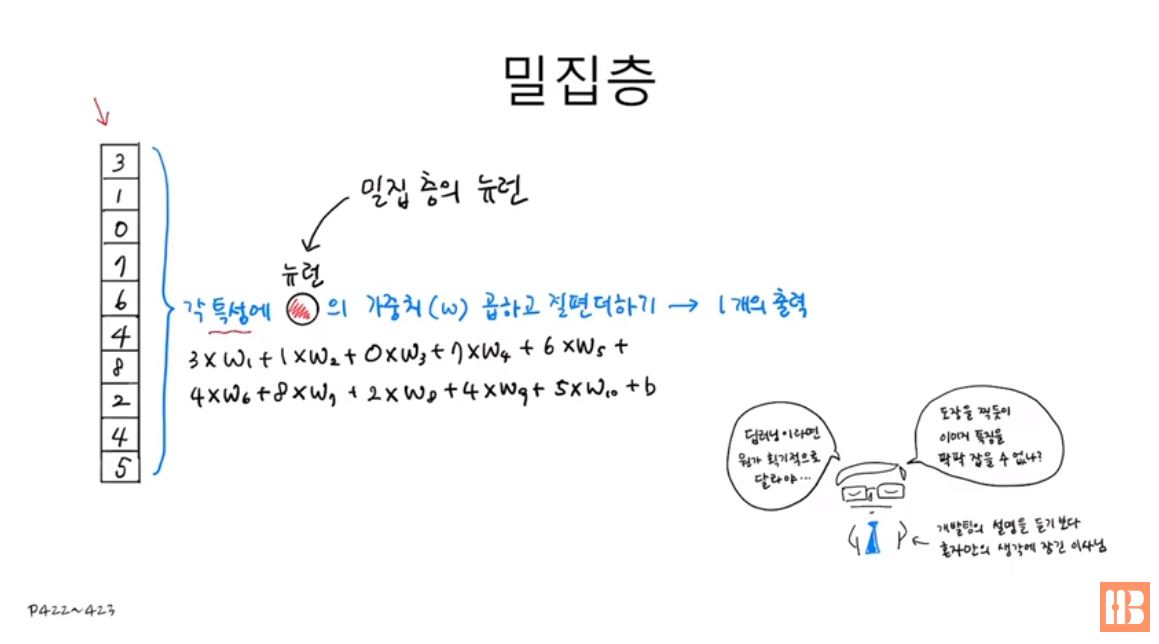

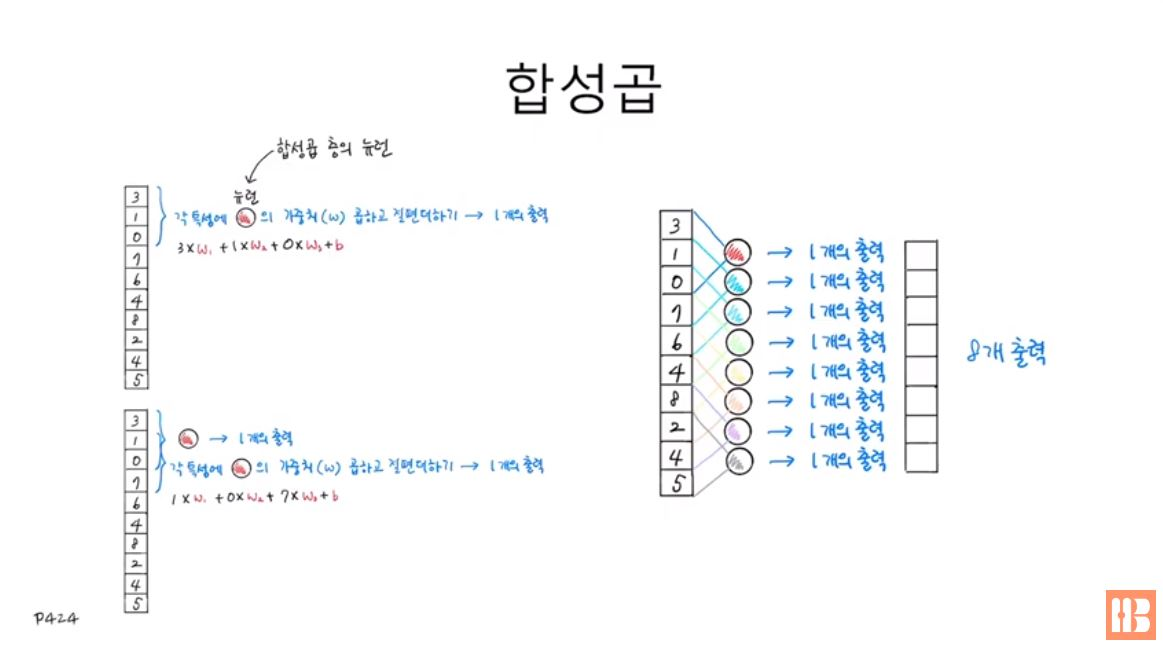

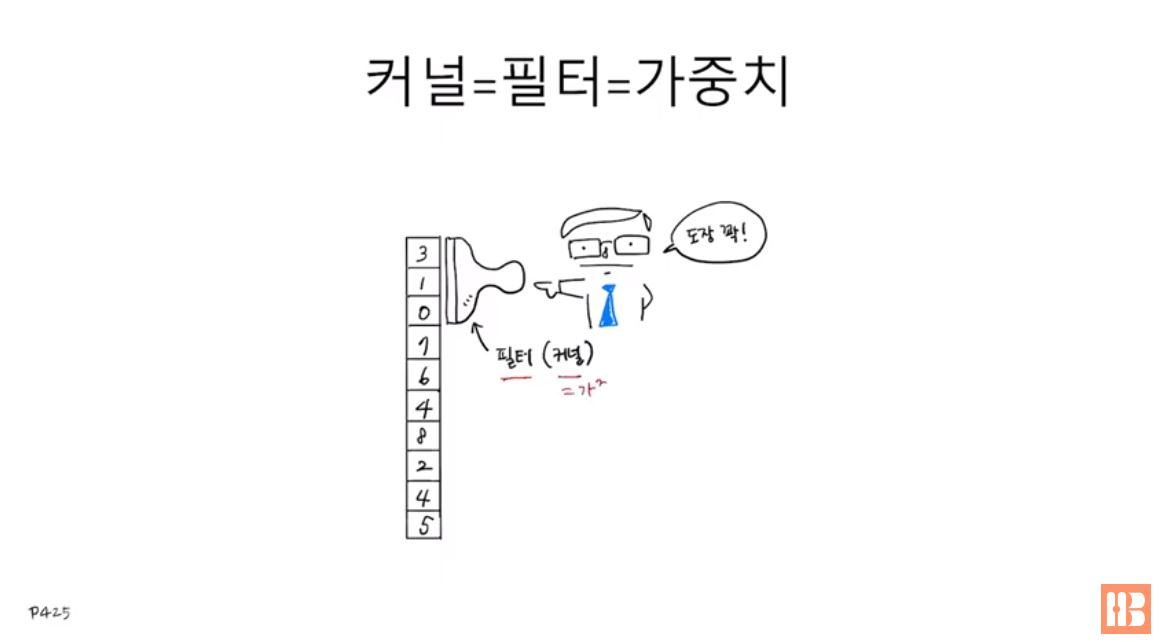

- 여기까지 1차원 합성곱만을 다뤄보았다.


---



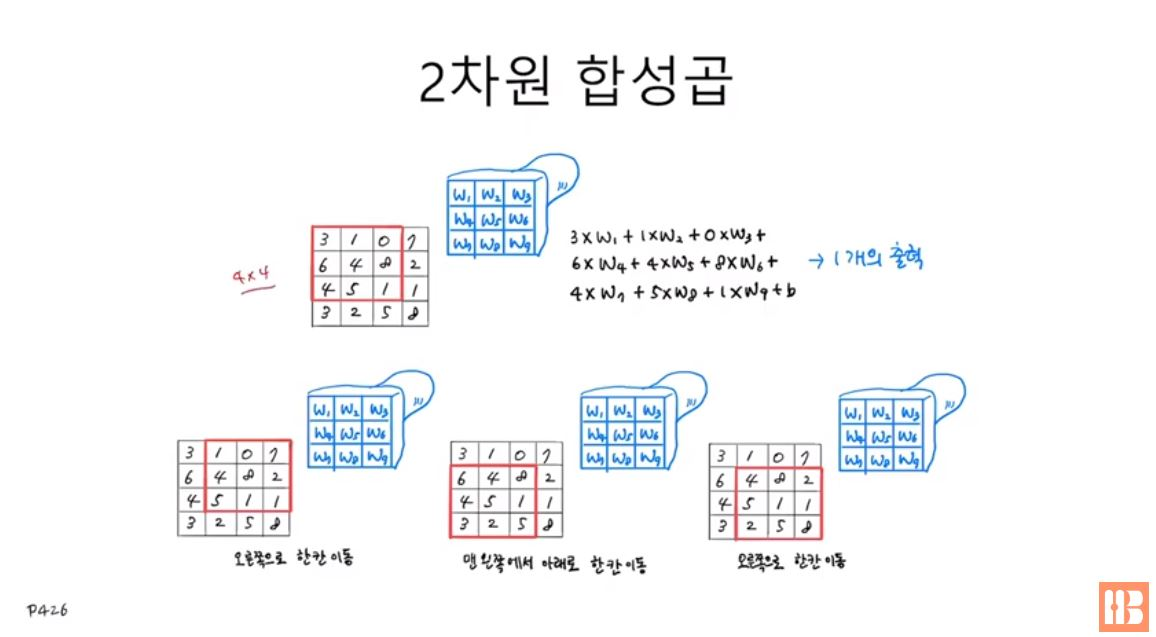

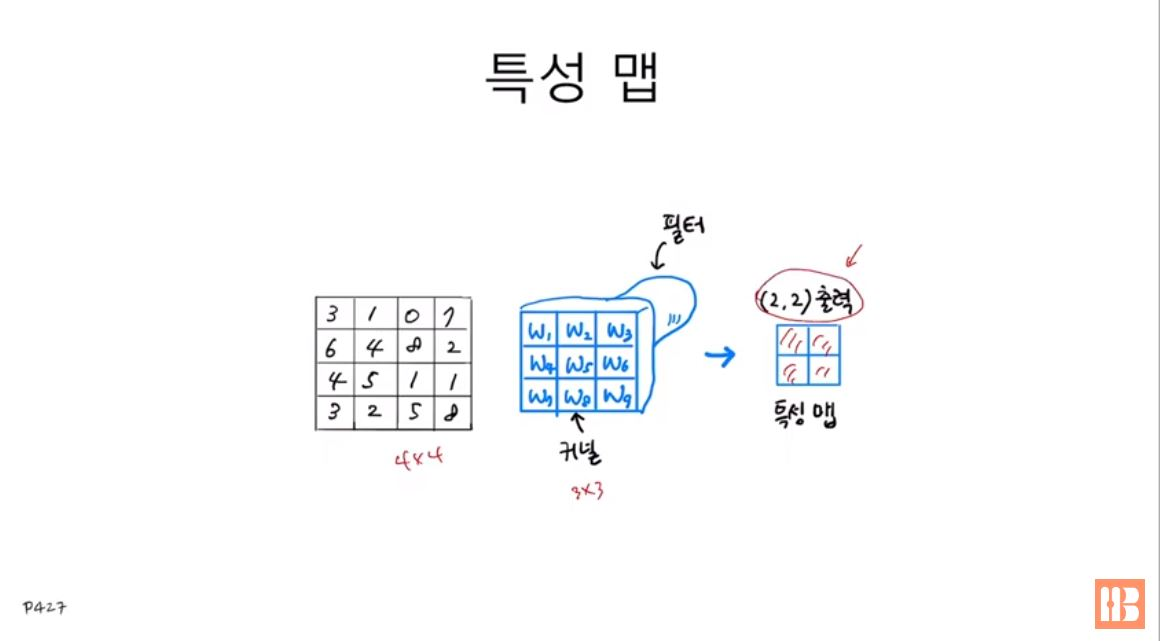

- 특성 맵: 커널을 거쳐 나온 합성곱 결과 Map

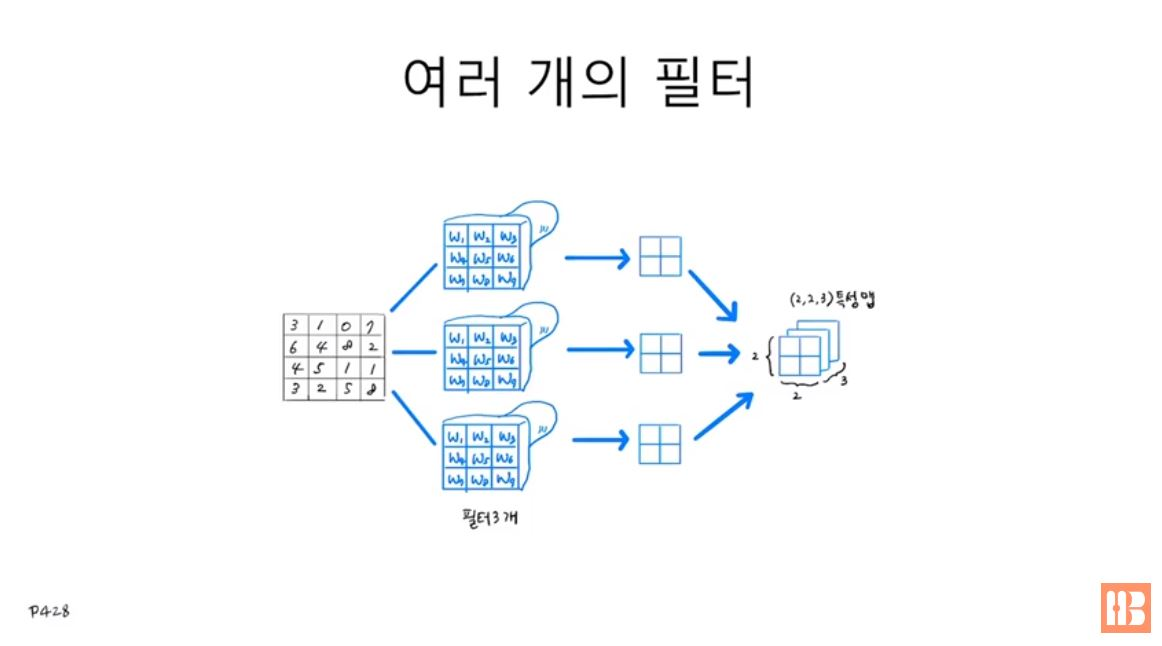

- 각각 다른 가중치를 가진 필터 3개를 적용해보자.
- 총 2*2의 특성 맵 3층을 구할 수 있다. = 3차원 특성 맵

## 케라스 합성곱 층

In [ ]:
from tensorflow import keras

# 10: 필터 개수
# kernal_size: 필터 크기 (보통 (3,3), (5,5) 사용)
# activation: 활성화 함수
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

## 패딩

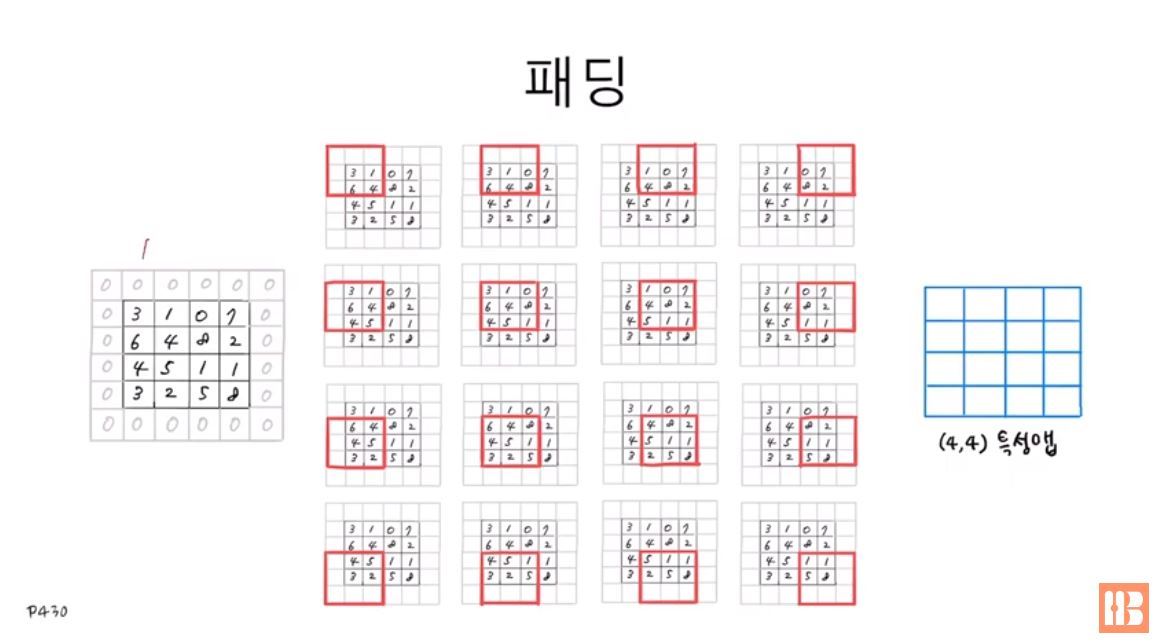

- 패딩이란?
  - 특성을 0으로된 한 줄의 배열로 감싸는 행위를 말함
  - 빈 배열을 추가함으로써 필터가 움직이는 범위를 넓히는게 목적

  => 결과적으로 (2,2)였던 특성맵을 (4,4)의 특성맵으로 만들 수 있음

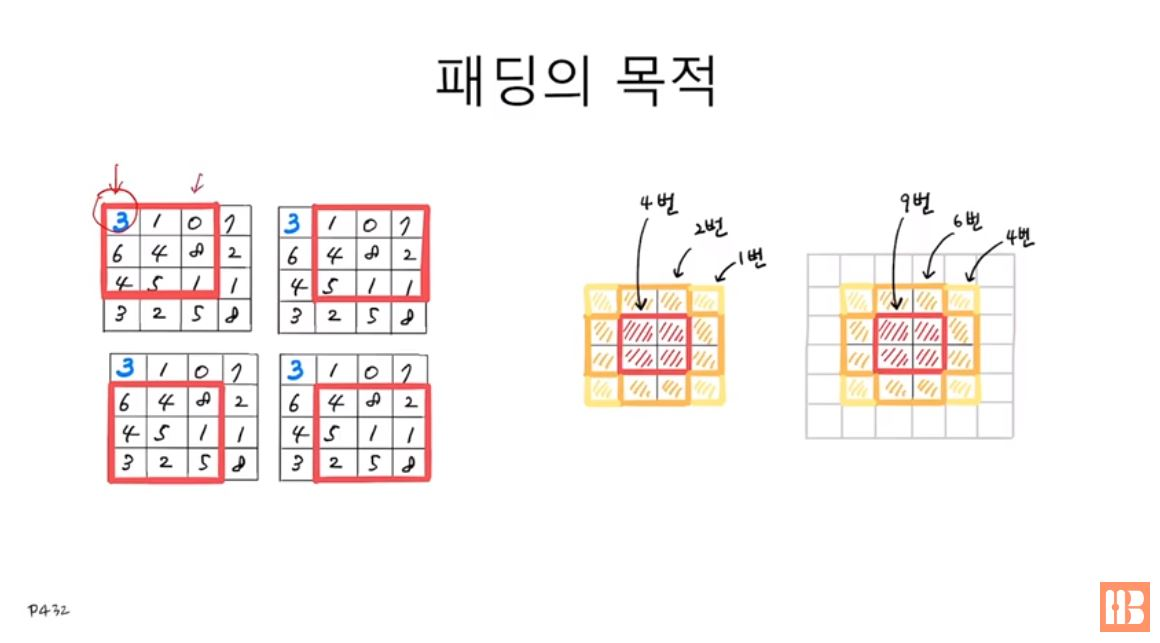

- 기존에는 좌측 상단의 '3' 특성이 1번만 사용됨
- 패딩을 하면 '3' 특성이 총 4번 사용되는 것을 확인할 수 있음

### 케라스의 패딩 설정

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

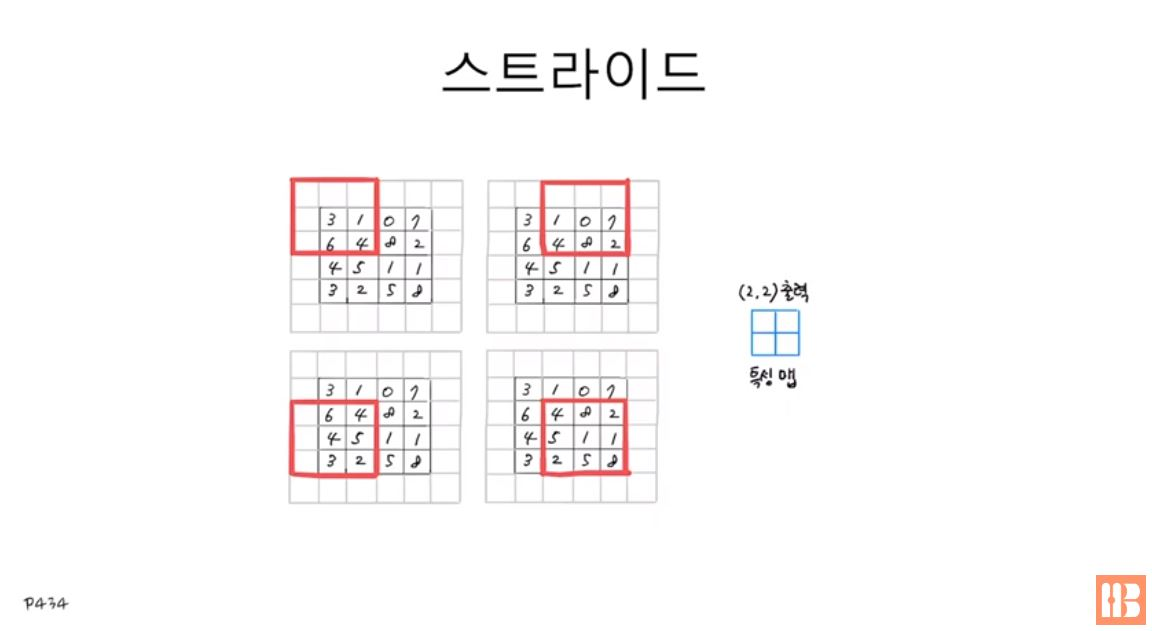

- 스트라이드
  - 필터가 한 번에 움직이는 거리를 의미
  - 기본값: 1

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

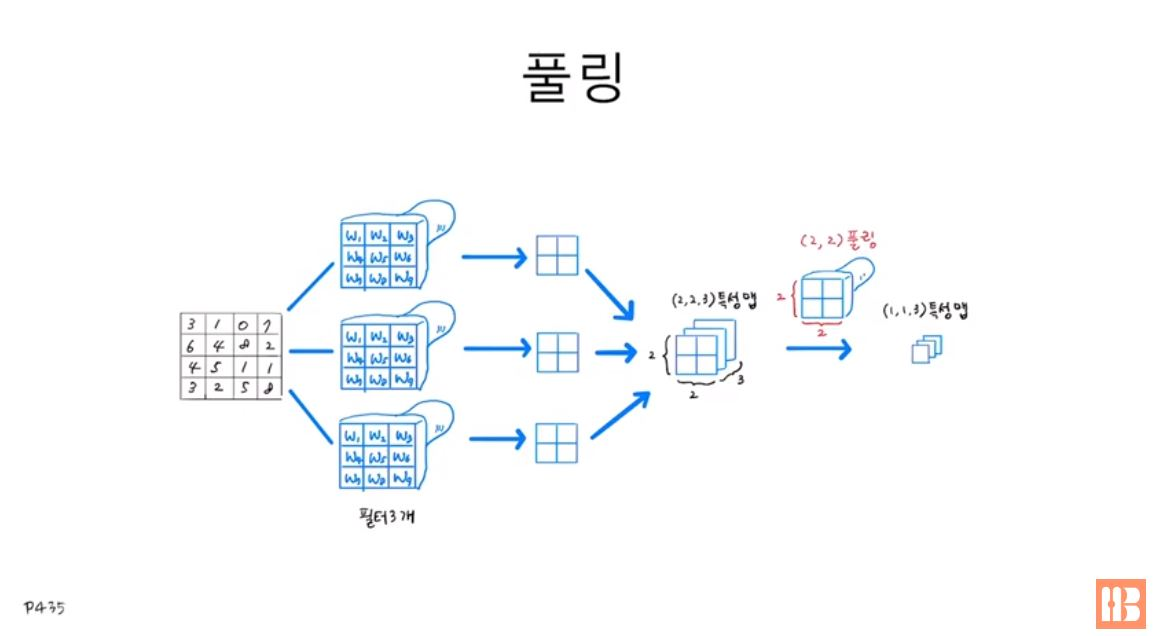

- 풀링
  - 특성 맵의 크기를 절반으로 줄이는 행위
  - 위에서는 4개의 픽셀을 1개로 압축하고 있음
  - 종류
    - 평균 풀링
      - 평균 값을 뽑아 사용하는 것
    - 최대 풀링
      - 최대 값을 뽑아 사용하는 것
  
- 채널 차원: 특성 맵에서 마지막 차원을 말함
  - 채널 차원은 보통 풀링하지 않고 사용

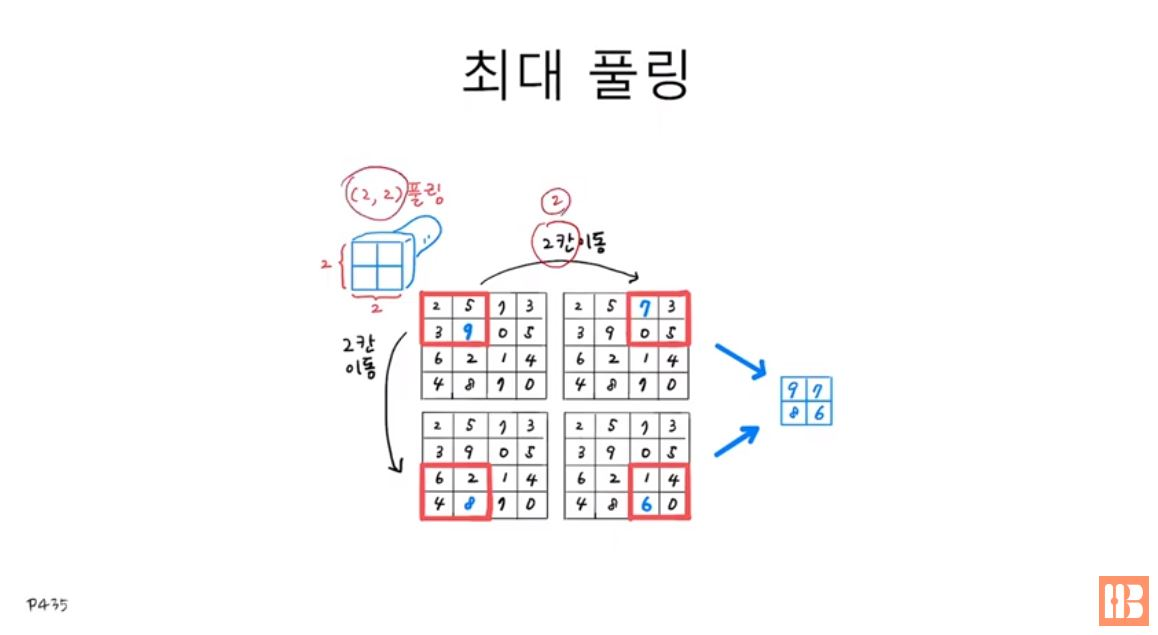

- 최대 풀링을 할 때는 특성값이 겹치지 않도록 풀링 크기만큼 이동한다.

### 케라스의 풀링 층

In [ ]:
keras.layers.MaxPooling2D(2)
# stride는 풀링 크기만큼 자동으로 지정되기 때문에 굳이 파라미터를 설정할 필요는 X
keras.layers.MaxPooling(2, strides=2, padding='valid')

## 전체적인 구조

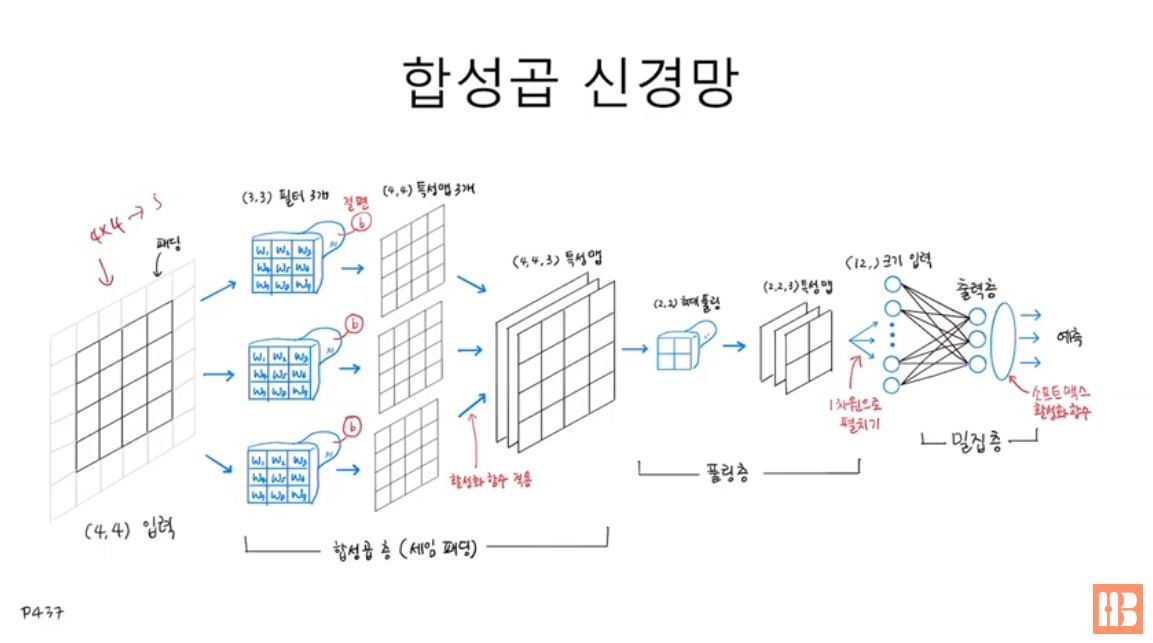

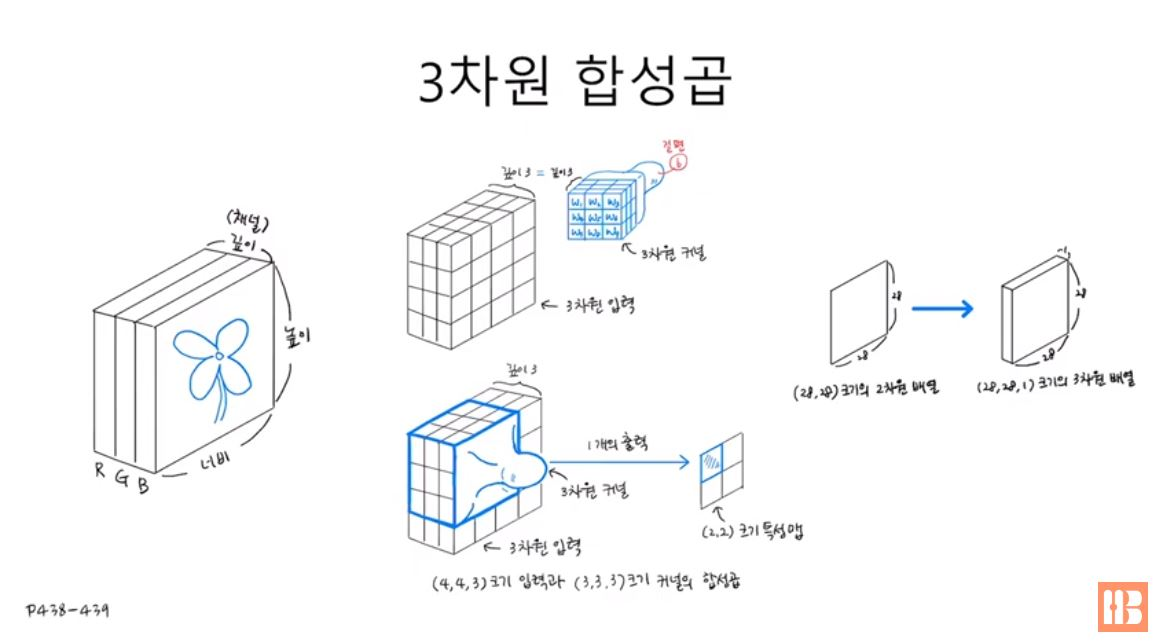

- 이미지 데이터에서 깊이를 취급하는 경우 => 3차원 합성곱
- 커널을 3차원으로 만들면 된다는 점에서 2차원과 큰 차이는 없음

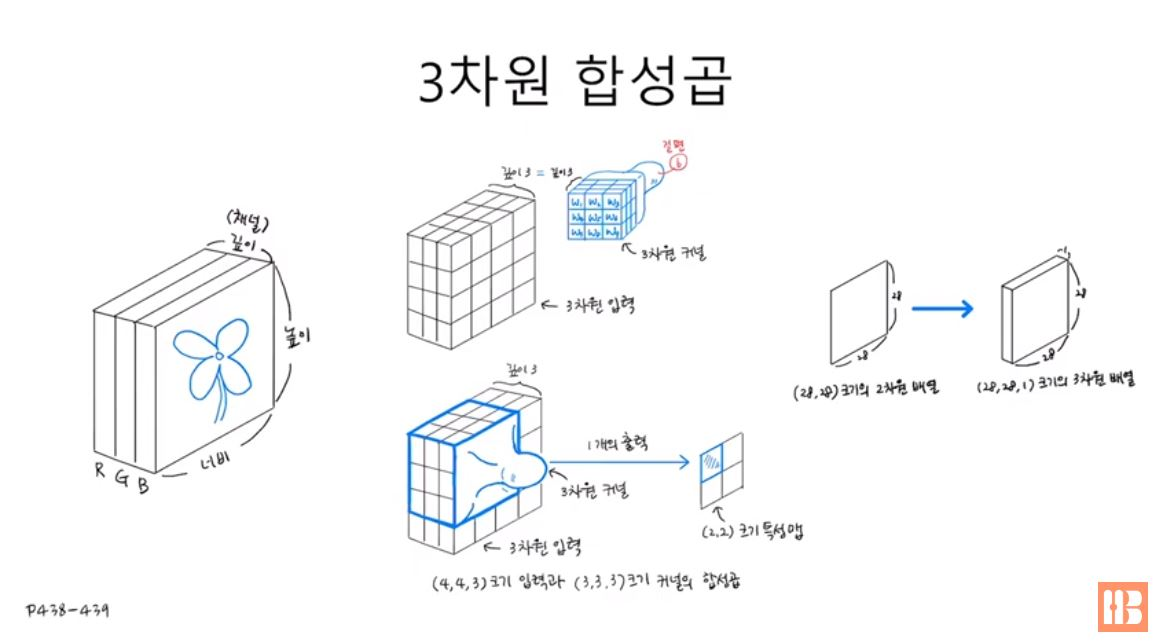